<a href="https://colab.research.google.com/github/Proverbs1603/AIDeepLearning/blob/main/week4/AI_DeepLearning_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some questions
- Say x, y are scalar, find derivatives of with respect to x and y.
(Set x = 2, y = 1 for the calculation)
- Set x, W and b as x = tf.constant(np.array([1.,4.,3.]).reshape(1,3), dtype=tf.float32)
W = tf.Variable(tf.random.uniform((3, 2)), dtype=tf.float32)
b = tf.Variable(tf.zeros((2,)), dtype=tf.float32)
- Find derivatives of with respect to W and b. (Hint: search for tf.pow() )

In [8]:
import numpy as np
import tensorflow as tf

x = tf.Variable(tf.constant(2.), dtype = tf.float32)
y = tf.Variable(tf.constant(1.), dtype = tf.float32)

f_xy = x*x*y + x*y + 3*y

with tf.GradientTape() as tape:
    z = x**2 * y + x*y + 3*y

grad_of_x_y_ = tape.gradient(z, [x, y])

In [9]:
grad_of_x_y_

[<tf.Tensor: shape=(), dtype=float32, numpy=5.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.0>]

In [10]:
W = tf.Variable(tf.random.uniform((3, 2)), dtype=tf.float32)
b = tf.Variable(tf.zeros((2,)), dtype=tf.float32)
x = tf.constant(np.array([1.,4.,3.]).reshape(1,3), dtype=tf.float32)
with tf.GradientTape() as tape:
    y = tf.pow(tf.matmul(x, W) + b, 3)
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [11]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 16.22972 ,  98.52026 ],
        [ 64.91888 , 394.08105 ],
        [ 48.689156, 295.5608  ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([16.22972, 98.52026], dtype=float32)>]

Some questions
- Modify our data: num_samples_per_class = 500
negative_samples = np.random.multivariate_normal( mean=[2, 3],
cov=[[1, 0.2],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal( mean=[3, 1],
cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
- Train the similar model using our modified data
(Hint: If something going weird, try to modify learning rate)

Generating two classes of random points in a 2D plane

In [12]:
num_samples_per_class = 500
negative_samples = np.random.multivariate_normal(
    mean=[2, 3],
    cov=[[1, 0.2],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 1],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

<ipython-input-12-c572f7a5902a>:2: RuntimeWarning: covariance is not positive-semidefinite.
  negative_samples = np.random.multivariate_normal(


Stacking the two classes into an array with shape (2000, 2)

In [13]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

Generating the corresponding targets (0 and 1)

In [14]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

Plotting the two point classes

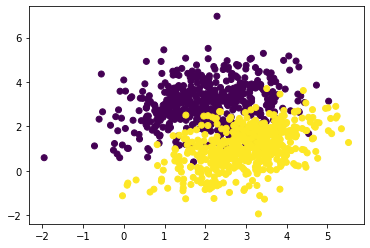

In [15]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Creating the linear classifier variables

In [16]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

The forward pass function

In [17]:
def model(inputs):
    return tf.matmul(inputs, W) + b

The mean squared error loss function

In [18]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

The training step function

In [24]:
learning_rate = 0.05

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

The batch training loop

In [25]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.1735
Loss at step 1: 0.1649
Loss at step 2: 0.1585
Loss at step 3: 0.1538
Loss at step 4: 0.1501
Loss at step 5: 0.1473
Loss at step 6: 0.1449
Loss at step 7: 0.1429
Loss at step 8: 0.1412
Loss at step 9: 0.1396
Loss at step 10: 0.1382
Loss at step 11: 0.1368
Loss at step 12: 0.1356
Loss at step 13: 0.1344
Loss at step 14: 0.1332
Loss at step 15: 0.1321
Loss at step 16: 0.1310
Loss at step 17: 0.1299
Loss at step 18: 0.1289
Loss at step 19: 0.1279
Loss at step 20: 0.1269
Loss at step 21: 0.1260
Loss at step 22: 0.1250
Loss at step 23: 0.1241
Loss at step 24: 0.1232
Loss at step 25: 0.1223
Loss at step 26: 0.1214
Loss at step 27: 0.1206
Loss at step 28: 0.1198
Loss at step 29: 0.1189
Loss at step 30: 0.1181
Loss at step 31: 0.1174
Loss at step 32: 0.1166
Loss at step 33: 0.1159
Loss at step 34: 0.1151
Loss at step 35: 0.1144
Loss at step 36: 0.1137
Loss at step 37: 0.1130
Loss at step 38: 0.1123
Loss at step 39: 0.1117


plotting

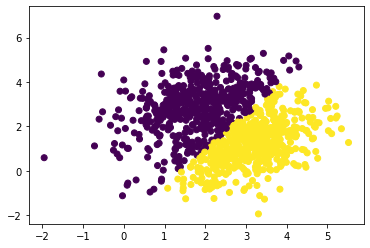

In [26]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

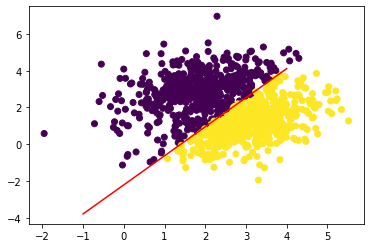

In [27]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)